# __Analysis of The Movie Database (TMDB)__

## Table of Contents

 - [Introduction](#introd)
 
 - [Data Wrangling](#wrangle)
     - [Data Cleaning](#cleaning)
     - [Columns Description](#desct)
 
 - [Exploratory Data Analysis](#edaa)
 
 - [Summary](#summary)

<a id='introd'> </a>
## Introduction 
The aim of this project is to analyse the TMDB dataset which contains information about the movies, their revenue,budget, genre, release date and many more. This project seeks to generate insights from the dataset.
    According to the data source <a href='https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'>Kaggle</a>,Major films costing over $100 million dollars can still flop. Meanwhile, some companies like Pixar have found a way to produce highly rated movies. This brings us to the main question of this analysis. _What features are important in determining highly rated,high revenue movies._
 

<a id='wrangle'></a>
## Data Wrangling

### Data load

In [1]:
# Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# reading raw data
tmdb_raw = pd.read_csv('tmdb-movies.csv')

tmdb_raw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# creating raw data copy
tmdb_df = tmdb_raw.copy()

In [4]:
# checking shape of  the data
def print_shape(df):
    row,col = df.shape
    print(f'The data has {row} rows and {col} columns')


In [5]:
print_shape(tmdb_df)

The data has 10866 rows and 21 columns


In [6]:
# checking general info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# convert release_date to the appropiate data type: datetime64[ns]
tmdb_df['release_date'] = pd.to_datetime(tmdb_df.release_date)

<a id='desct'></a>
#### __The data__ 
The data contains over 10,000 individual movies


__Columns Description__<br>
This is a description of columns that will be used in this report<br>

    * original_title: This contains the title of the movies in each observation(rows)
    * budget: This is the total amount spent during the productioin of a movie
    * revenue: This is the total amount generated from the movie after producion_NB: This is not the same as profit_
    * director: This is the name of the diretor of the movie
    * runtime:  This is the duration of a movie in minutes
    * genres: This is a list of the genres present in a movie. This column has an object(string) dtype, each genre is seprated by a pipe symbol('|')
    * vote_average: This is the average vote rating(1-10)
    * release_year: The year the movie was released
    * release_date: The date the movie was released. We used this column to get the release month and decade.
_NB:The currency used in this dataset(revenue,budget) is in dollars($)_


<a id='cleaning'></a>
## Data cleaning

In [8]:
# checking for missing values
tmdb_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

This dataset contains missing values in about seven(7) columns. This rows that contain missing values will not be dropped, the reason being that the important features(runtime, budget, revenue and title) are not missing. Dropping the rows can significantly affect our dataset too.

In [9]:
# checking for duplicates
dup = tmdb_df.duplicated()
dup.sum()

1

In [10]:
# view duplicate(s)
tmdb_df[dup]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


There is only one duplicate in the dataset. After inspection we can see that the duplicate is a repetition,hence, the row will be dropped

In [11]:
# drop duplicate
tmdb_df.drop_duplicates(inplace=True)

In [12]:
# check that there is no more duplicates
tmdb_df.duplicated().sum()

0

In [13]:
# check summary statistics of the columns
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the tabel above we can observe three problems

 - The minimum values for budget,revenue and runtime is zero(0).
 - Any movie that was truly produced cannot have this values as zero.
 
We'll conduct further investigation into this problem

In [14]:
# get the subset of the data that has budget/revenue/runtime as zero
zero_df = tmdb_df[ (tmdb_df.budget == 0)|(tmdb_df.revenue == 0)|(tmdb_df.runtime == 0) ]
zero_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,2015-06-19,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,2015-09-03,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,2015-04-17,81,5.5,2015,0.000000e+00,4.222338e+04


In [15]:
print_shape(zero_df)

The data has 7011 rows and 21 columns


The data was filtered to only rows that have the budget,runtime,revenue columsn as 0. 

We consulted with the data source and the internet, and found out that the data is not supposed to be zero . All the rows have non zero values but must have been lost during data gathering. 

The amount of observation having this condition is quite large. There is no way to get this missing values within the scope of this project.

The rows with this condition will be dropped.


In [16]:
tmdb_df.drop(zero_df.index,inplace=True)

In [17]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='edaa'></a>
## Exploratory Data Analysis (EDA)

<a id='hrev'></a>
1. Highest grossing movies(10)

In [18]:
tmdb_df.sort_values(by='revenue',ascending=False).loc[:,['original_title','revenue','vote_average']].head(10).reset_index(drop=True)

,original_title,revenue,vote_average
0,Avatar,2781505847,7.1
1,Star Wars: The Force Awakens,2068178225,7.5
2,Titanic,1845034188,7.3
3,The Avengers,1519557910,7.3
4,Jurassic World,1513528810,6.5
5,Furious 7,1506249360,7.3
6,Avengers: Age of Ultron,1405035767,7.4
7,Harry Potter and the Deathly Hallows: Part 2,1327817822,7.7
8,Frozen,1274219009,7.5
9,Iron Man 3,1215439994,6.9


<a id='hrated'></a>
2. Highest rated movies(10)

In [19]:
tmdb_df.sort_values(by='vote_average',ascending=False).loc[:,['original_title','revenue','vote_average']].head(10).reset_index(drop=True)

,original_title,revenue,vote_average
0,The Shawshank Redemption,28341469,8.4
1,Stop Making Sense,4978922,8.4
2,The Godfather,245066411,8.3
3,Whiplash,13993093,8.2
4,Forrest Gump,677945399,8.1
5,Schindler's List,321265768,8.1
6,The Dark Knight,1001921825,8.1
7,Pulp Fiction,213928762,8.1
8,Fight Club,100853753,8.1
9,The Godfather: Part II,47542841,8.1


<a id='hbud'></a>
3. The costliest movies(10)

In [20]:
tmdb_df.sort_values(by='budget',ascending=False).loc[:,['original_title','budget','vote_average']].head(10).reset_index(drop=True)

,original_title,budget,vote_average
0,The Warrior's Way,425000000,6.4
1,Pirates of the Caribbean: On Stranger Tides,380000000,6.3
2,Pirates of the Caribbean: At World's End,300000000,6.8
3,Avengers: Age of Ultron,280000000,7.4
4,Superman Returns,270000000,5.3
5,Tangled,260000000,7.3
6,John Carter,260000000,6.0
7,Spider-Man 3,258000000,5.8
8,The Lone Ranger,255000000,6.0
9,Harry Potter and the Half-Blood Prince,250000000,7.3


From the tables above, we can observe the higest revenue,budget and rated movies. It is interesting to see that none of the costly movies 
were in the top grossing movies

4. Movie releases over the years

Text(0, 0.5, 'Movie count')

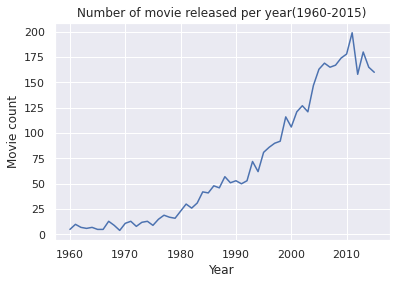

In [21]:
movie_count = tmdb_df.groupby('release_year').size().plot()
plt.title('Number of movie released per year(1960-2015)')
plt.xlabel('Year')
plt.ylabel('Movie count')

Movie production has been on a steady rise in since the  1960s .

We can observe a sharp increase from the late 90s till 2010s where it peaks before declining slightly

Text(0, 0.5, 'Avg revenue')

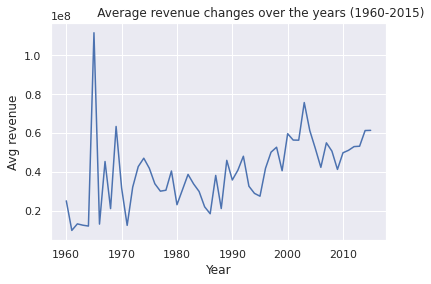

In [22]:
# observable changes in revenue and budget 
revenues = tmdb_df.groupby('release_year').revenue.median().plot()
plt.title('                      Average revenue changes over the years (1960-2015)')
plt.xlabel('Year')
plt.ylabel('Avg revenue')


Text(0, 0.5, 'Avg budget')

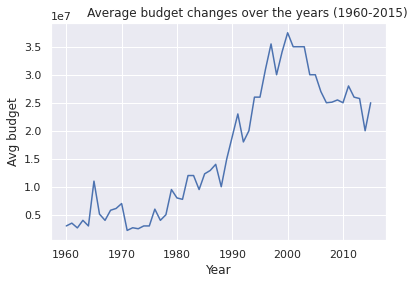

In [23]:
budgets = tmdb_df.groupby('release_year').budget.median().plot()
plt.title('               Average budget changes over the years (1960-2015)')
plt.xlabel('Year')
plt.ylabel('Avg budget')

5. How does amount movie released vary from month to month?

In [24]:
# create decade columns
tmdb_df['decade'] = (tmdb_df.release_year//10)*10

In [25]:
# create month column
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
tmdb_df['month'] = tmdb_df.release_date.dt.month_name()
# groupby decade and release year
monthly_releases = tmdb_df.groupby(['decade','month']).size().unstack().fillna(0)
# swap index(decade) for columns(month) and vice versa
monthly_releases= monthly_releases[months].transpose()

Text(0.5, 66.5, 'Year')

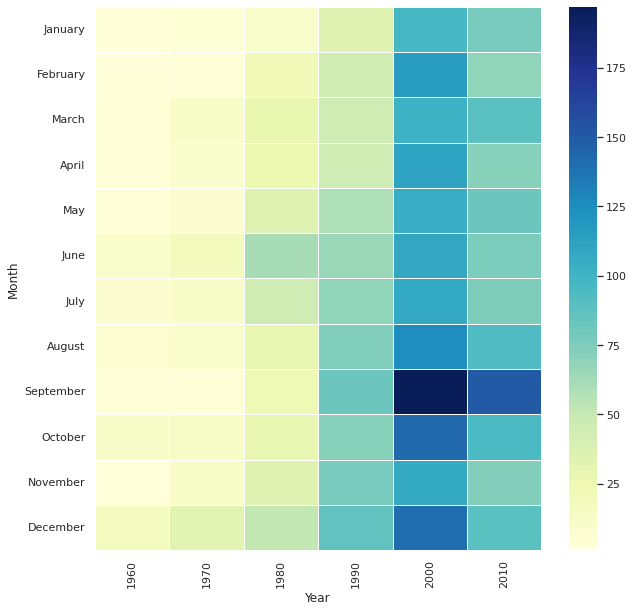

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(monthly_releases,linewidths=0.5,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.ylabel('Month')
plt.xlabel('Year')

We can see from the heat map that movies are mostly released later in the year ( August-December) with the highest amount of releases coming in September.

In [27]:
def subplots(x,y:list,dim:tuple,data):
    """ This function plots subplots of kind 'scatter' from the list of features passed into the argument y against feature x
        x = pd.Series
        y= [pd.Series,...]
        dim = dimension (rows,columns)
        data = pd.DataFrame 
        """
    sns.set()
    row,col = dim
    fig, axes = plt.subplots(row,col,figsize=(18,16))
    nrow = 0
    ncol = 0
    if row*col < len(y):
        raise ValueError
    for feature in y:
            if row == 1 or col == 1:
                sns.scatterplot(x=x,y=feature,data=data,ax=axes[nrow+ncol-1])
            else:
                sns.scatterplot(x=x,y=feature,data=data,ax=axes[nrow,ncol])
            ncol +=1
            if ncol == col:
                nrow+=1
                ncol = 0
    plt.show()        
            

In [28]:
def plot_dist(df,column):
    """ This function plots the histogram of the features passed in the column arguments
    df = pd.DataFrame
    column = column name """
    plt.hist(df[column],bins=20,histtype='stepfilled',density=True)
    sns.kdeplot(data=df, x=column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.axvline(df[column].median(), color='k', linestyle='dashed', linewidth=1)

    min_ylim, max_ylim = plt.ylim()
    plt.text(df[column].median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(df[column].median()))


6. Distribution of some quantitative variables in the dataset

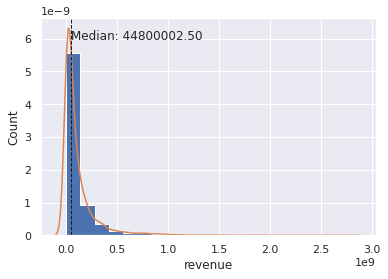

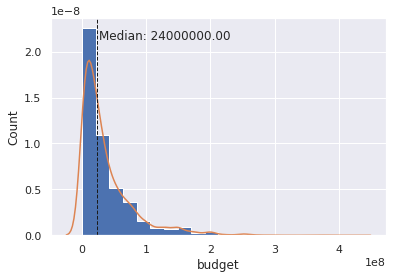

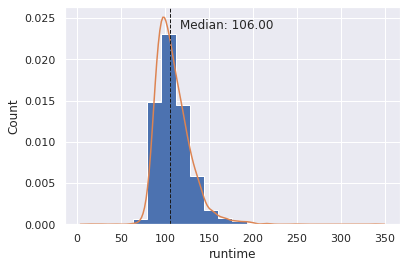

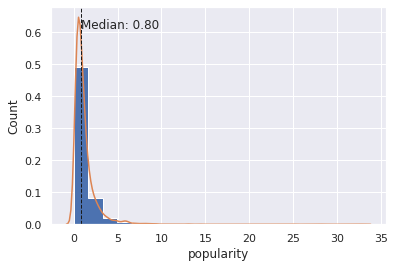

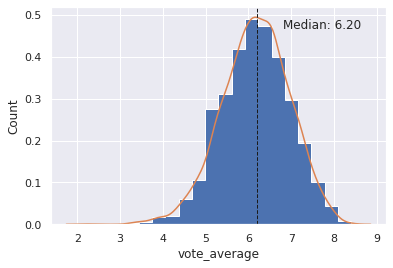

In [29]:
columns = ['revenue','budget','runtime','popularity','vote_average']
for col in columns:
    plt.figure()
    plot_dist(tmdb_df,col)

7. What features show relationsip with the rating of a movie?

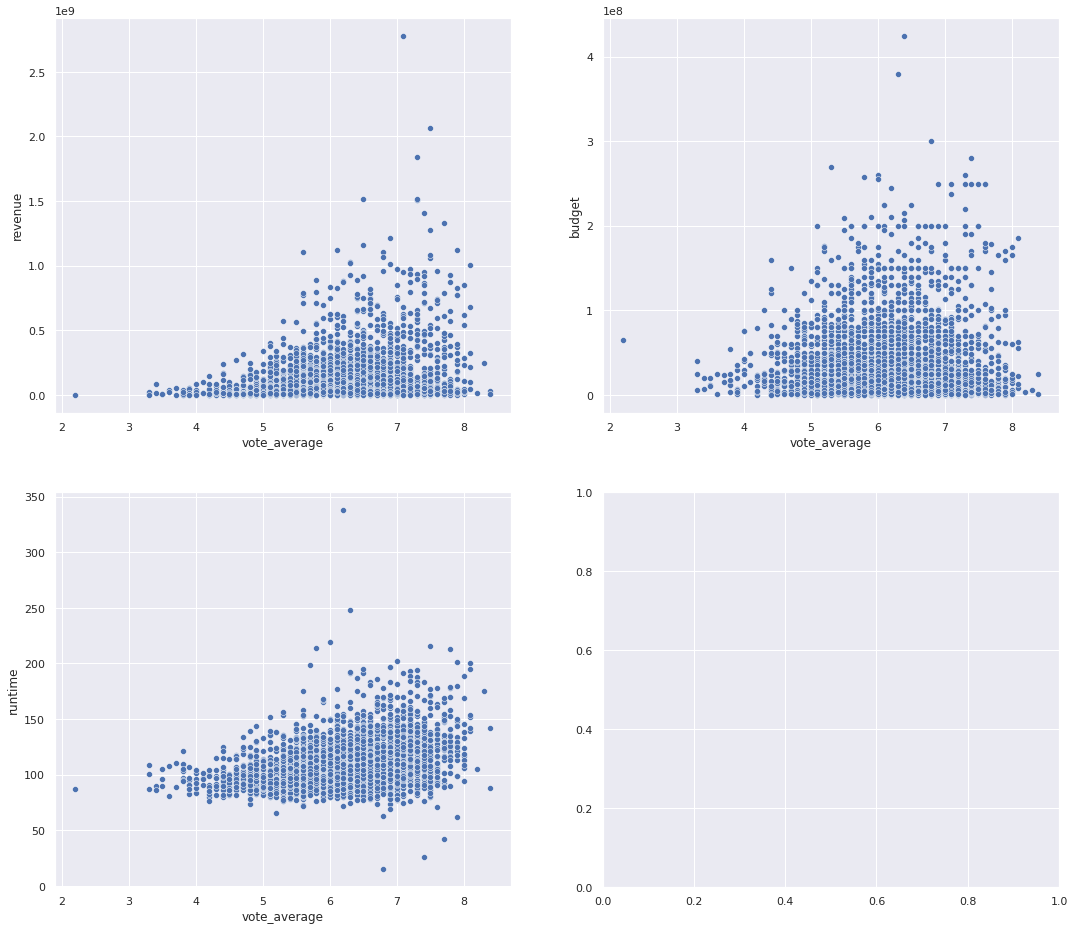

In [30]:
columns = ['revenue','budget','runtime']
subplots('vote_average',columns,(2,2),tmdb_df)

revenue plot: Most of the data points lie within the rating of 5 and 7.5.<br>
Most high revenue movies have vote_average rating close to the mean(6.20)

8. Which properties are associated with high revenue movies?

In [31]:
# find the 75% revenue of all movies
high_revenue = np.percentile(tmdb_df.revenue,85)
high_revenue_df = tmdb_df[tmdb_df.revenue >= high_revenue]

In [32]:
# gets summary statistics of high_revenue_df
high_revenue_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
count,578.000000,578.000000,5.780000e+02,5.780000e+02,578.000000,578.000000,578.000000,578.000000,5.780000e+02,5.780000e+02,578.000000
mean,39710.628028,2.866689,9.623490e+07,4.271026e+08,118.103806,1800.607266,6.513495,2004.370242,1.050072e+08,5.022928e+08,2000.155709
std,64165.957305,2.772579,6.066755e+07,2.701685e+08,22.296714,1488.751887,0.702403,8.934071,5.899092e+07,3.292180e+08,9.735317
min,11.000000,0.131526,2.500000e+04,2.022929e+08,78.000000,48.000000,4.400000,1961.000000,3.272632e+04,1.871533e+08,1960.000000
25%,950.750000,1.411489,5.000000e+07,2.509091e+08,100.000000,727.250000,6.000000,1999.000000,6.078452e+07,2.951586e+08,1990.000000
50%,9619.500000,2.172710,8.500000e+07,3.351086e+08,116.000000,1360.500000,6.500000,2007.000000,9.688083e+07,4.028970e+08,2000.000000
75%,49535.750000,3.410232,1.365000e+08,4.947770e+08,131.000000,2483.750000,7.000000,2012.000000,1.465084e+08,6.078361e+08,2010.000000
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,2010.000000


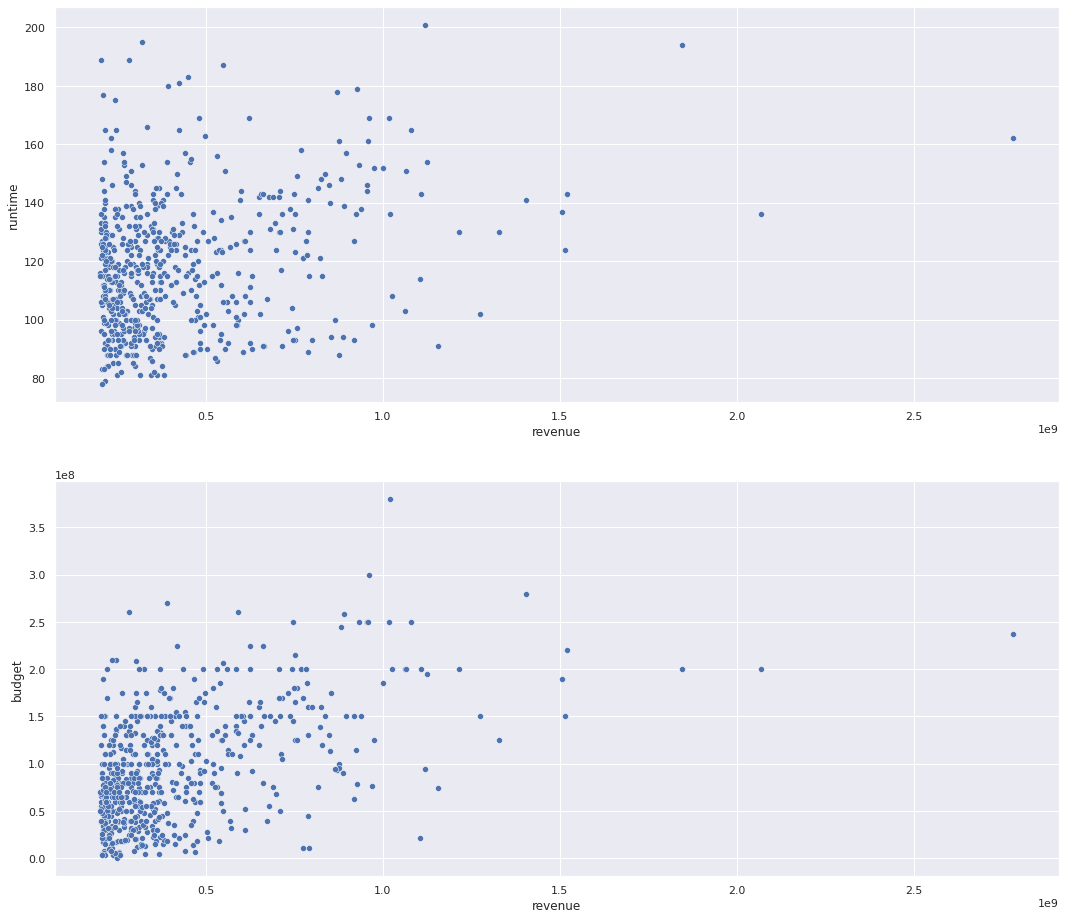

In [33]:
# lets observe the relationsip between high revenue movies with budget and runtime
columns = ['budget','runtime']
subplots('revenue',columns,(2,1),high_revenue_df)

We can see that all extremely high revenue movies have a budget below 3.0e8 <br>
The runtimes for high revenue movies are between 140 minutes and 120 minutes

9. Most popular genre in each decade

In [34]:
genre_df = tmdb_df.copy()
genre_df['Genre'] = genre_df.genres.str.split('|')
genre_df = genre_df.explode('Genre')

Text(0.5, 1.0, 'Most common genre ')

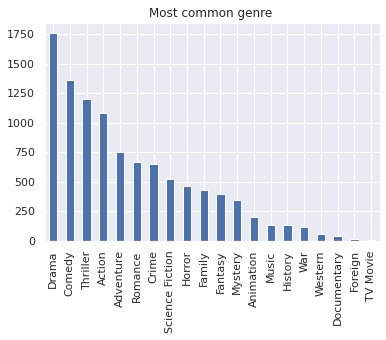

In [35]:
# most common genre
genre_df.Genre.value_counts().plot(kind='bar')
plt.title('Most common genre ')

In [36]:
grouped = genre_df.groupby(['decade','Genre'],as_index=False).Genre.agg('size')
grouped

,decade,Genre,size
0,1960,Action,19
1,1960,Adventure,23
2,1960,Animation,2
3,1960,Comedy,16
4,1960,Crime,9
...,...,...,...
106,2010,Romance,150
107,2010,Science Fiction,127
108,2010,Thriller,313
109,2010,War,26


<AxesSubplot:title={'center':'Most common genre(3) per decade'}, xlabel='Decades', ylabel='Count'>

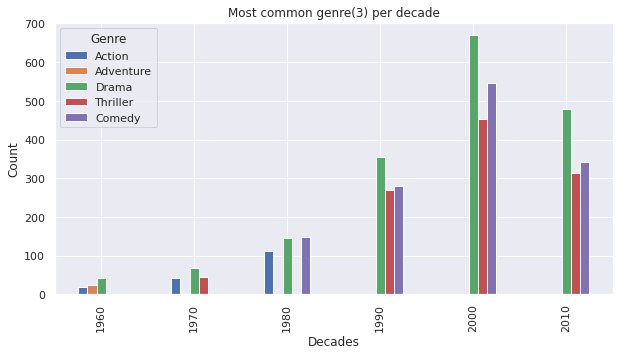

In [37]:
df = None
for decade in [1960,1970,1980,1990,2000,2010]:
    table = grouped[grouped.decade == decade].sort_values('size',ascending=False).head(3).pivot(index='decade',columns='Genre',values='size')
    if df is None:
        df = table
    else:
        df = pd.concat([df,table]).fillna(0)
title = 'Most common genre(3) per decade'
df.plot(kind='bar',figsize=(10,5),title=title,xlabel='Decades',ylabel='Count',grid=True)

10. What genre is common among high revenue movies?

<AxesSubplot:>

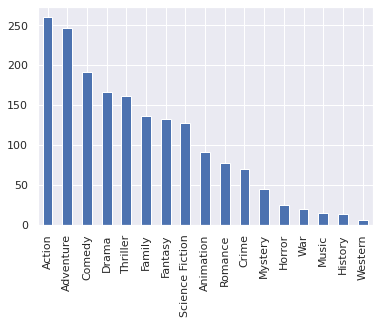

In [38]:
genre_df[genre_df.revenue >= high_revenue].Genre.value_counts().plot(kind='bar')

<a id='summary'></a>
## Summary



- Number of movie released per year has been increasing steadily
- Movies get released later in the year more often than not, With September being the peak month of releases. January and February experience the least number of movie releases
- No movie in the [highest revenue](#hrev) and [highest budget](#hbud) were present in the [highest rated](#hrated) movies. After subsequent investigation, we could see that the rating of a movie is not dependent on the budget or revenue.
- Most high revenue movies have a runtime between 120 and 140 minutes
- Drama, action, comedy, thriller and adventure are the most common genre of all time
